STATISTICS PRACTICAL IMPLEMENTATION

1.mean
2.median
3.mode

In [3]:
ages=[23,24,32,45,12,43,67,45,32,56,32,120]

In [4]:
import numpy as np
print(np.mean(ages))
print(np.median(ages))

44.25
37.5


In [5]:
import statistics 
print(statistics.mean(ages))
print(statistics.median(ages))

44.25
37.5


In [6]:
print(statistics.mode(ages))

32


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


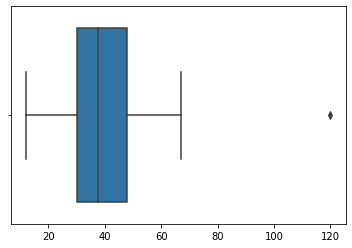

In [7]:
import seaborn as sns
sns.boxplot(ages)

5 Number summary

In [8]:
import numpy as np
q1,q3=np.percentile(ages,[25,75])

In [9]:
print(q1,q3)

30.0 47.75


In [10]:
## to check outlier[Lower Fence- Higher fence]
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


Measure of dispersion

1.Variance
2.standard deviation

In [11]:
statistics.variance(ages)  #sample variance /n-1

795.2954545454545

In [12]:
np.var(ages)   #population variance /n

729.0208333333334

In [13]:
def variance(data):   #manually will do sample variance
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-1)
  return variance


In [14]:
variance(ages)

795.2954545454545

In [15]:
def variance(data,dof=0):   # #manually will population variance
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-dof)
  return variance


In [16]:
variance(ages,dof=0)  

729.0208333333334

In [17]:
import math
math.sqrt(statistics.pvariance(ages))       

27.000385799712813

Histograms and PDF

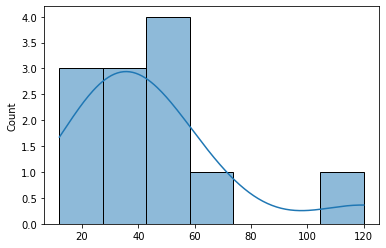

In [18]:
import seaborn as sns
sns.histplot(ages,kde=True)

In [19]:
df=sns.load_dataset('iris')

In [20]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


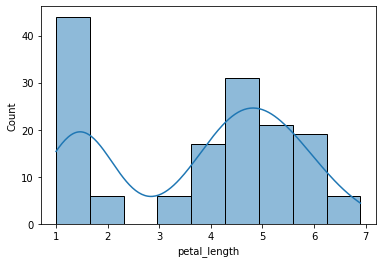

In [21]:
sns.histplot(df['petal_length'],kde=True)

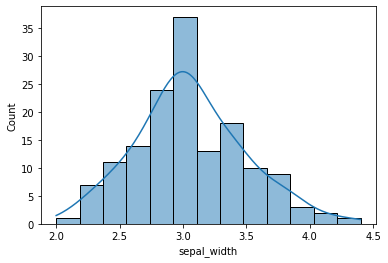

In [22]:
sns.histplot(df['sepal_width'],kde=True)

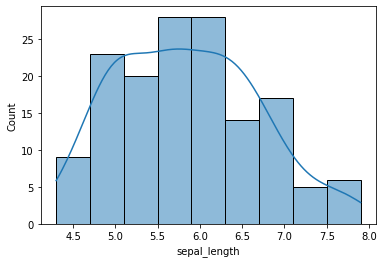

In [23]:
sns.histplot(df['sepal_length'],kde=True)

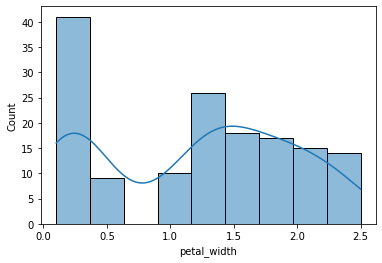

In [24]:
sns.histplot(df['petal_width'],kde=True)

In [25]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)

In [26]:
s

array([ 0.09322833,  0.29059256,  0.3932264 ,  0.49490983,  0.8255862 ,
        0.48734431,  0.61046245,  0.42903436,  0.61208098,  0.65724146,
        0.54744369,  0.36584625,  0.33978981,  0.24975475,  0.67981089,
        0.46169135,  0.7044047 ,  0.80992954,  0.41825837,  1.06008586,
        0.37829739,  0.48112608,  0.78793903,  0.24269594,  0.765796  ,
        0.53492343,  0.42226524,  0.76455537,  0.46781704,  0.44135503,
        0.42207732,  0.52905703,  0.32527946,  0.51269864,  0.15855185,
        0.3564602 ,  0.60749342,  0.08176098,  0.73468633,  0.68946144,
        0.44984818,  0.41853004,  0.56942107,  0.68727008,  0.51563163,
        0.43761205,  0.75653794,  0.58141459,  0.24994966,  0.80601176,
        0.44171701,  0.63026269,  0.47549147,  0.2179088 ,  0.51190058,
        0.39518207,  0.75653494,  0.09547027,  0.26454744,  0.72310677,
        0.71385265,  1.09522212,  0.53710614,  0.37811727,  0.48161778,
        0.53217635,  0.83579262,  0.64256011,  0.42305424,  0.22

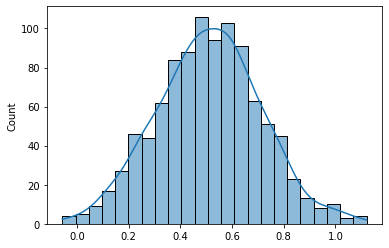

In [27]:
sns.histplot(s,kde=True)

Other Distribuiton
Log Normal Distribution,Power Law Distribution

In [28]:
mu,sigma=3.,1 #mean and standad deviation

In [30]:

s=np.random.lognormal(mu,sigma,1000)

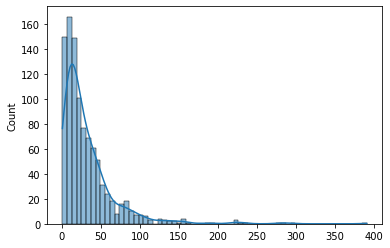

In [31]:
sns.histplot(s,kde=True)

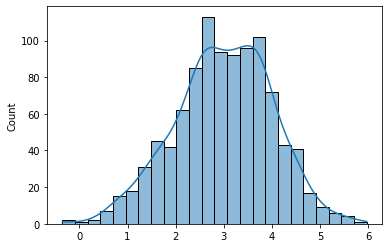

In [32]:
sns.histplot(np.log(s),kde=True)

Check whether Disstribution is Normal Distribution

In [33]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()


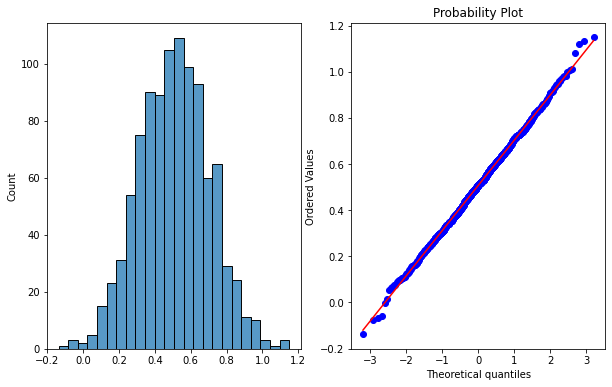

In [34]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

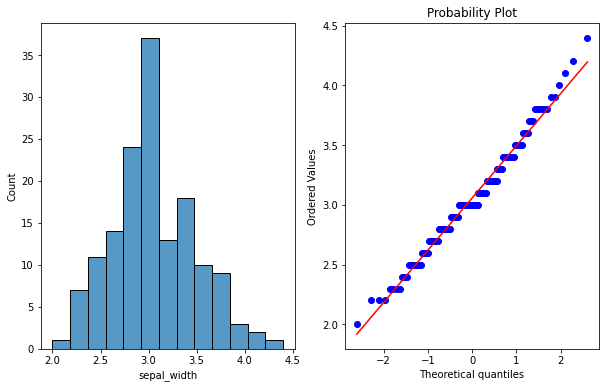

In [35]:
plot_data(df['sepal_width'])

In [36]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [37]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

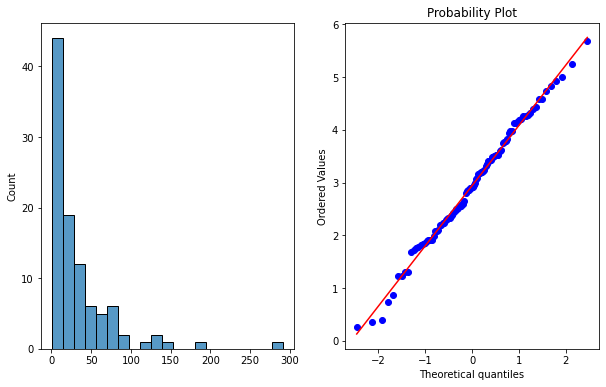

In [38]:
plot_data_log(sample)

Pearson and Sperman Rank Correlation

In [39]:
df=sns.load_dataset('tips')

In [40]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [41]:
import pandas as pd

In [42]:
df.corr()



,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


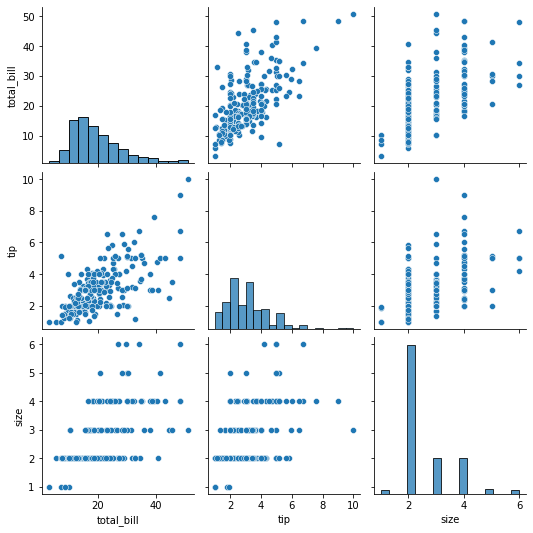

In [43]:
sns.pairplot(df)